## Q: How often are low budget movies profitable?

### 1.Set up libraries for Data Cleaning & EDA
- pandas
- numpy
- matplotlib
- seaborn

In [88]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2

In [90]:
# Let's read our datasets from the provided movie sources
box_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [91]:
# Remove $ and , format to production budgets in order for Python to function as integers
movie_budgets.head()
movie_budgets.production_budget[0].replace(",", "").replace('$', "")

'425000000'

In [92]:
# movie_budgets.dtype shows objects. Convert to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(lambda x: x.replace(",", "").replace('$', "")).astype(int)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(lambda x: x.replace(",", "").replace('$', "")).astype(int)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(lambda x: x.replace(",", "").replace('$', "")).astype(int)
#money_values_to_integer(movie_budgets, 'production_budget')
#money_values_to_integer(movie_budgets, 'domestic_gross')
#money_values_to_integer(movie_budgets, 'worldwide_gross')
movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [96]:
# Verify domestic, worldwide gross columns = integeres
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.1+ KB


In [99]:
# Let's data clean to clearly see ascending budget and create column which calculates profit
movie_budgets['profitability'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget']
movie_budgets.sort_values(['production_budget'], axis=0, inplace=True)
movie_budgets.head()
movie_budgets.round({'profitability':2})

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability
5781,82,"Aug 5, 2005",My Date With Drew,1100,181041,181041,164.58
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0.27
5778,79,"Apr 2, 1999",Following,6000,48482,240495,40.08
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0.13
5775,76,"May 26, 2006",Cavite,7000,70071,71644,10.23
5774,75,"Oct 8, 2004",Primer,7000,424760,841926,120.28
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,291.70
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.00
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,0.51


In [ ]:
# Let's visualize the distribution of low budget movies that return profit

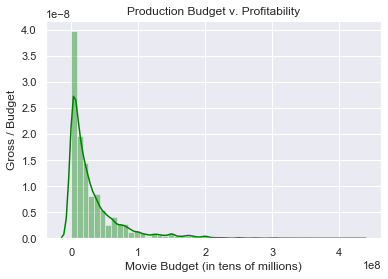

In [100]:
sns.set(style='darkgrid')
sns.set_context('notebook', font_scale=1)
plt.title('Production Budget v. Profitability')
plt.ylabel('Gross / Budget')
sns.distplot(movie_budgets['production_budget'], bins= color= 'green', axlabel= 'Movie Budget (in tens of millions)')

# OR sns.lmplot('production_budget', 'worldwide_gross', hue='profitability', data=movie_budgets)